In [1]:
# 필요한 모듈 import
import os

import pandas as pd # Deal with DataFrame with Pandas library
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Draw graph with SNS library 
import matplotlib.pyplot as plt # Draw graph with matplotlib library
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
case = pd.read_csv('Case.csv')
pat_info = pd.read_csv('PatientInfo.csv')
policy = pd.read_csv('Policy.csv')
region = pd.read_csv('Region.csv')
search_trend = pd.read_csv('SearchTrend.csv')
seoul_floating = pd.read_csv('SeoulFloating.csv')
time = pd.read_csv('Time.csv')
time_age = pd.read_csv('TimeAge.csv')
time_gender = pd.read_csv('TimeGender.csv')
time_province = pd.read_csv('TimeProvince.csv')
weather = pd.read_csv('Weather.csv')

# 아이디어 1

## 20-30대 확진자가 어느 구에서 많이 나오는지?

In [3]:
pat_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [4]:
young = ((pat_info.age == '20s') | (pat_info.age == '30s')) & (pat_info.province == 'Seoul') # 시리즈가 아니라 데이터 프레임으로 만들어야합니다.

In [6]:
pat_info[young]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
6,1000000007,male,20s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,1000000700,male,30s,Korea,Seoul,Yangcheon-gu,Itaewon Clubs,NaN,NaN,NaN,2020-05-11,NaN,NaN,isolated
737,1000000738,male,20s,Korea,Seoul,Yangcheon-gu,Itaewon Clubs,NaN,NaN,NaN,2020-05-18,NaN,NaN,released
738,1000000739,male,20s,Korea,Seoul,Yangcheon-gu,Itaewon Clubs,NaN,NaN,NaN,2020-05-18,NaN,NaN,released
753,1000000754,male,30s,Korea,Seoul,Yangcheon-gu,Biblical Language study meeting,NaN,NaN,2020-05-18,2020-05-20,NaN,NaN,released


In [7]:
print(type(pat_info[young]))

<class 'pandas.core.frame.DataFrame'>


In [8]:
young

0       False
1        True
2       False
3        True
4        True
        ...  
5160    False
5161    False
5162    False
5163    False
5164    False
Length: 5165, dtype: bool

In [9]:
print(type(young)) # dataframe으로 진행을 해야하는데, 못 해서 에러가 나온 것으로 보임.

<class 'pandas.core.series.Series'>


In [10]:
print(type(pat_info))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 데이터프레임화 하는 방법
pd.DataFrame({"열이름1": Series, "열이름2": Series})

In [11]:
print(pat_info.columns) # x, y 에 들어야할 값

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')


In [12]:
grouped = pat_info[young].groupby(pat_info['city'])

In [13]:
grouped.size()

city
Dobong-gu           4
Dongdaemun-gu      19
Dongjak-gu         14
Eunpyeong-gu        9
Gangbuk-gu          1
Gangdong-gu         4
Gangnam-gu         26
Gangseo-gu         12
Geumcheon-gu        3
Guro-gu             5
Gwanak-gu          17
Gwangjin-gu         6
Jongno-gu           5
Jung-gu             2
Jungnang-gu         9
Mapo-gu            12
Nowon-gu            8
Seocho-gu          18
Seodaemun-gu       10
Seongbuk-gu        11
Seongdong-gu        2
Songpa-gu          26
Yangcheon-gu       10
Yeongdeungpo-gu     8
Yongsan-gu          8
etc                16
dtype: int64

In [17]:
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [21]:
result= pd.DataFrame(grouped.size(), columns=['number'])
result

,number
city,
Dobong-gu,4
Dongdaemun-gu,19
Dongjak-gu,14
Eunpyeong-gu,9
Gangbuk-gu,1
Gangdong-gu,4
Gangnam-gu,26
Gangseo-gu,12
Geumcheon-gu,3


In [22]:
result.columns

Index(['number'], dtype='object')

In [23]:
result.index

Index(['Dobong-gu', 'Dongdaemun-gu', 'Dongjak-gu', 'Eunpyeong-gu',
       'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu', 'Gangseo-gu', 'Geumcheon-gu',
       'Guro-gu', 'Gwanak-gu', 'Gwangjin-gu', 'Jongno-gu', 'Jung-gu',
       'Jungnang-gu', 'Mapo-gu', 'Nowon-gu', 'Seocho-gu', 'Seodaemun-gu',
       'Seongbuk-gu', 'Seongdong-gu', 'Songpa-gu', 'Yangcheon-gu',
       'Yeongdeungpo-gu', 'Yongsan-gu', 'etc'],
      dtype='object', name='city')

In [24]:
sorted = result.sort_values(by='number', ascending=True)

In [25]:
sorted

,number
city,
Gangbuk-gu,1
Seongdong-gu,2
Jung-gu,2
Geumcheon-gu,3
Dobong-gu,4
Gangdong-gu,4
Guro-gu,5
Jongno-gu,5
Gwangjin-gu,6


<AxesSubplot:ylabel='city'>

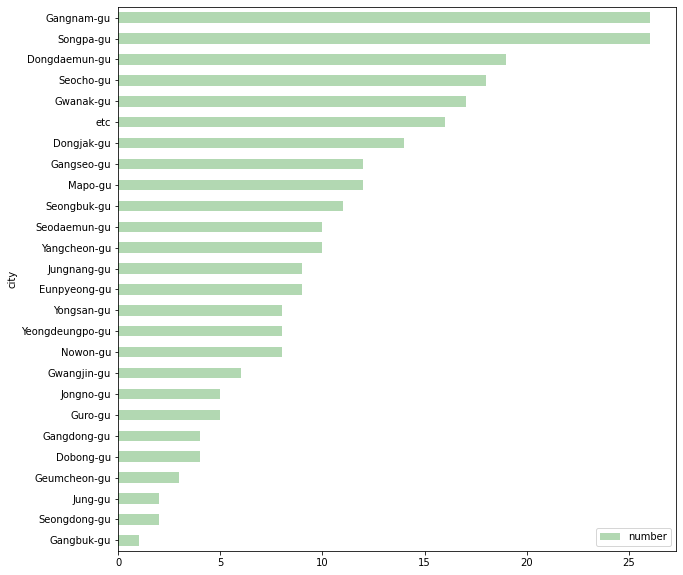

In [29]:
sorted.plot(kind = "barh",color='g', alpha=0.3, figsize=(10, 10))

20~30대를 타켓으로 하였을 때, 확진자가 많이 나온 순으로 구를 나열하자면,

강남구, 송파구, 동작구 순으로 나열 할 수 있으며, 강북구가 가장 낮은 확진자가 나왔음을 확인 할 수 있었습니다.

# 아이디어 2

## 실제로 음식점에서 많이 나오는지? 관광지나 헬스장 등의 장소 중 어디에서 가장 많이 확진자가 나올까??

In [32]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


## case 데이터를 확진자 수(x축)와 지역 (y축)으로 시각화를 진행해 본 결과 대구에서 확진자가 가장 많이 나왔음을 알 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='confirmed', ylabel='province'>

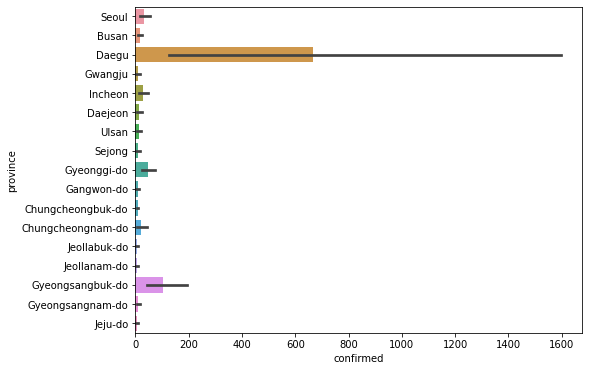

In [36]:
plt.figure(figsize = (8, 6))
sns.barplot('confirmed', 'province', data = case)

## 대부분의 감염은 신천지 교회에서 발생했으며, 그 다음은 병원에서 발생했음을 확인 할 수 있습니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='confirmed', ylabel='infection_case'>

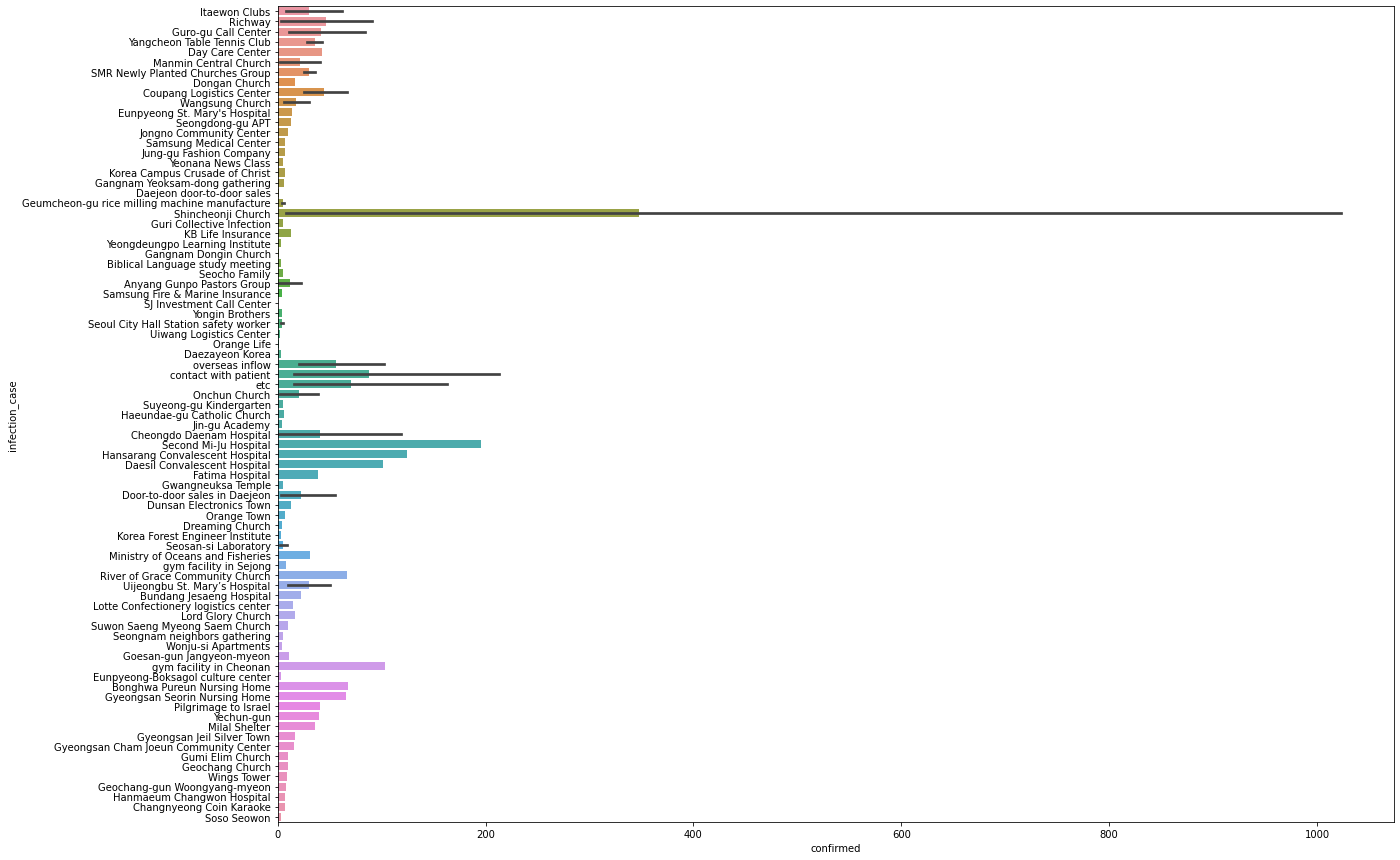

In [37]:
plt.figure(figsize = (20, 15)) 
sns.barplot('confirmed','infection_case', data = case)

## 가장 많이 감염자의 수가 많은 도시는 대구 남구입니다.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='confirmed', ylabel='city'>

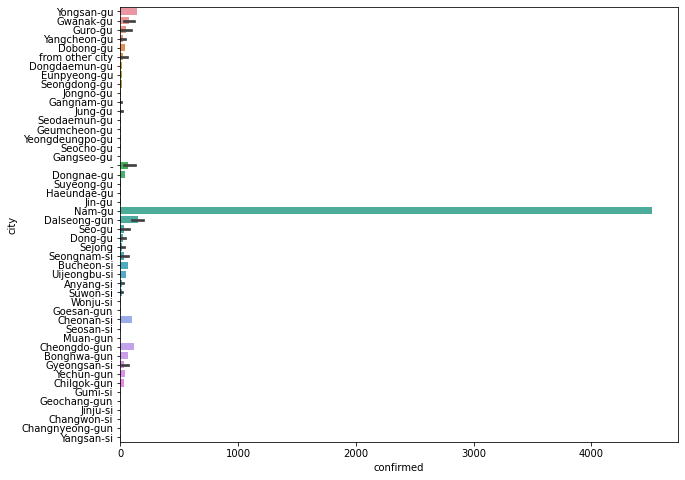

In [38]:
plt.figure(figsize = (10,8)) 
sns.barplot('confirmed','city', data = case)

## 신천지교회(가장 많이 감염된 곳)가 어느 도, 시군에 있는지 알아보기 위해 도, 시, 감염 건별로 데이터를 그룹화했습니다.

### 신천지교회는 감염률이 가장 높은 곳 대구 남구에 위치해 있습니다.

In [39]:
d = case.groupby(['province','city','infection_case']).sum()

In [40]:
pd.set_option('display.max_rows', d.shape[0]+1)
pd.set_option('display.max_columns', d.shape[0]+1)

In [41]:
d

case_id  \
province          city            infection_case                                            
Busan             -               contact with patient                            1100009   
                                  etc                                             1100010   
                                  overseas inflow                                 1100008   
                  Dongnae-gu      Onchun Church                                   1100001   
                  Haeundae-gu     Haeundae-gu Catholic Church                     1100004   
                  Jin-gu          Jin-gu Academy                                  1100005   
                  Suyeong-gu      Suyeong-gu Kindergarten                         1100003   
                  from other city Cheongdo Daenam Hospital                        1100007   
                                  Itaewon Clubs                                   1100006   
                                  Shincheonji Church                              1100002   
Chungcheongbuk-do -               contact with patient                            4000006   
                                  etc                                             4000007   
                                  overseas inflow                                 4000005   
                  Goesan-gun      Goesan-gun Jangyeon-myeon                       4000001   
                  from other city Guro-gu Call Center                             4000003   
                                  Itaewon Clubs                                   4000002   
                                  Shincheonji Church                              4000004   
Chungcheongnam-do -               contact with patient                            4100007   
                                  etc                                             4100008   
                                  overseas inflow                                 4100006   
                  Cheonan-si      gym facility in Cheonan                         4100001   
                  Seosan-si       Seosan-si Laboratory                            4100003   
                  from other city Door-to-door sales in Daejeon                   4100002   
                                  Eunpyeong-Boksagol culture center               4100005   
                                  Richway                                         4100004   
Daegu             -               contact with patient                            1200009   
                                  etc                                             1200010   
                                  overseas inflow                                 1200008   
                  Dalseong-gun    Daesil Convalescent Hospital                    1200004   
                                  Second Mi-Ju Hospital                           1200002   
                  Dong-gu         Fatima Hospital                                 1200005   
                  Nam-gu          Shincheonji Church                              1200001   
                  Seo-gu          Hansarang Convalescent Hospital                 1200003   
                  from other city Cheongdo Daenam Hospital                        1200007   
                                  Itaewon Clubs                                   1200006   
Daejeon           -               Door-to-door sales in Daejeon                   1500001   
                                  contact with patient                            1500009   
                                  etc                                             1500010   
                                  overseas inflow                                 1500008   
                  Seo-gu          Dreaming Church                                 1500004   
                                  Dunsan Electronics Town                         1500002   
                                  Korea Forest Engineer Institute                 1

## 'group' 열의 True 및 False 값을 정수로 바꾸기

In [43]:
# In the provinces the majority of infection happened among groups

lt.figure(figsize = (6,6)) 
sns.violinplot('group', 'province',data = case)

NameError: name 'lt' is not defined